# Regression 

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import boston_housing
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
(x_train, y_train), (x_test, y_test)= boston_housing.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [3]:
scaler= preprocessing.StandardScaler().fit(x_train)

x_trainn_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [4]:
print(x_trainn_scaled.shape, x_test_scaled.shape)

(404, 13) (102, 13)


In [5]:
model= Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

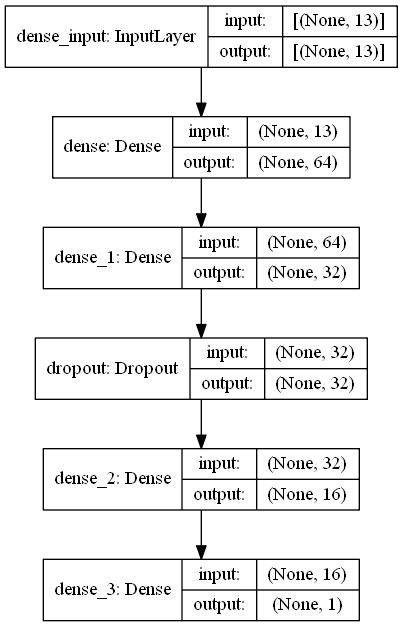

In [6]:
plot_model(model, show_layer_names=True, show_shapes=True)

In [7]:
import tensorflow as tf
model.compile(loss=tf.keras.losses.MeanSquaredError(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['mean_absolute_error'])



# OR

#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(x_trainn_scaled, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
13/13 - 2s - loss: 560.5182 - mean_absolute_error: 21.7680
Epoch 2/100
13/13 - 0s - loss: 523.1287 - mean_absolute_error: 20.8337
Epoch 3/100
13/13 - 0s - loss: 456.2925 - mean_absolute_error: 19.1508
Epoch 4/100
13/13 - 0s - loss: 355.6432 - mean_absolute_error: 16.4052
Epoch 5/100
13/13 - 0s - loss: 222.6788 - mean_absolute_error: 12.4068
Epoch 6/100
13/13 - 0s - loss: 105.1157 - mean_absolute_error: 7.7968
Epoch 7/100
13/13 - 0s - loss: 65.1087 - mean_absolute_error: 6.0150
Epoch 8/100
13/13 - 0s - loss: 53.2877 - mean_absolute_error: 5.4859
Epoch 9/100
13/13 - 0s - loss: 40.8761 - mean_absolute_error: 4.7615
Epoch 10/100
13/13 - 0s - loss: 33.4677 - mean_absolute_error: 4.2966
Epoch 11/100
13/13 - 0s - loss: 31.6840 - mean_absolute_error: 4.0235
Epoch 12/100
13/13 - 0s - loss: 29.5509 - mean_absolute_error: 3.8958
Epoch 13/100
13/13 - 0s - loss: 28.0872 - mean_absolute_error: 3.9748
Epoch 14/100
13/13 - 0s - loss: 29.2421 - mean_absolute_error: 3.7652
Epoch 15/100
13/13

In [9]:
loss, metrics= model.evaluate(x_test_scaled, y_test, batch_size=32, verbose=2)

4/4 - 0s - loss: 20.5665 - mean_absolute_error: 2.9443


In [10]:
prediction= model.predict(x_test_scaled)

for i in range(10):
    print('Expected %.2f --> Predicted %.2f' % (prediction[i], y_test[i]))

Expected 8.74 --> Predicted 7.20
Expected 18.89 --> Predicted 18.80
Expected 21.39 --> Predicted 19.00
Expected 34.03 --> Predicted 27.00
Expected 24.38 --> Predicted 22.20
Expected 19.79 --> Predicted 24.50
Expected 26.32 --> Predicted 31.20
Expected 21.07 --> Predicted 22.90
Expected 19.87 --> Predicted 20.50
Expected 21.70 --> Predicted 23.20


# Classification

In [11]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [12]:
dataset= pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
x= dataset.iloc[:, 0:13]
y= dataset.iloc[:, 13:14]

In [14]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y.head()

,heartdisease
0,1
1,1
2,1
3,1
4,1


In [16]:
print(x.shape, y.shape)

(303, 13) (303, 1)


In [17]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=10)
print(x_train.shape, x_test.shape, y_train.shape, y_test. shape)

(212, 13) (91, 13) (212, 1) (91, 1)


In [18]:
model= Sequential()
model.add(Dense(64, input_dim=15, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

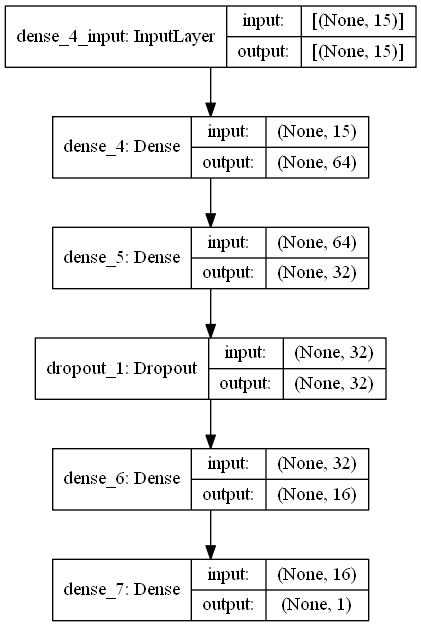

In [19]:
plot_model(model, show_layer_names=True, show_shapes=True)

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2)

Epoch 1/100


ValueError: in user code:

    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Abdullah\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 15 but received input with shape (None, 13)


In [29]:
loss, accuracy= model.evaluate(x_test, y_test, verbose=2)

ValueError: in user code:

    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\training.py:1330 test_function  *
        return step_function(self, iterator)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Abdullah\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\training.py:1313 run_step  **
        outputs = model.test_step(data)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\training.py:1267 test_step
        y_pred = self(x, training=False)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Abdullah\Anaconda3\lib\site-packages\keras\engine\input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 15 but received input with shape (None, 13)


# Multiclass Classification

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [33]:
(x_train, y_train),(x_test, y_test)= mnist.load_data()

In [34]:
print(x_train.shape, y_train.shape,  y_test.shape)

(60000, 28, 28) (60000,) (10000,)


3


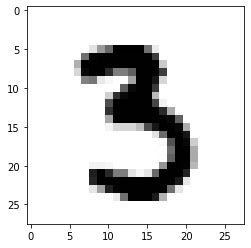

In [35]:
# display training data
plt.imshow(x_train[298], cmap='Greys')
print(y_train[298])

In [36]:
# reshape input fromn (28,28) to 784
x_train= x_train.reshape(60000, 784)
x_test= x_test.reshape(10000, 784)

In [37]:
# converting values to float
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

In [38]:
# normalizing RGB code 
x_train /= 255
x_test /= 255

In [39]:
# to_categorical is used to convert vector to binary matrix
y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [40]:
model= Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

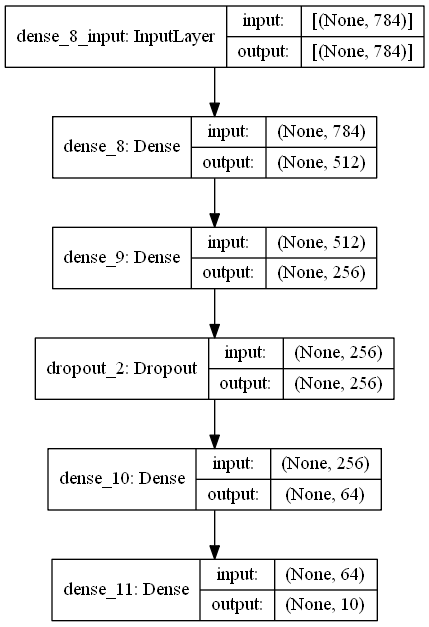

In [41]:
plot_model(model, show_layer_names=True, show_shapes=True)

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [43]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.2575 - categorical_accuracy: 0.9218
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0945 - categorical_accuracy: 0.9711
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0624 - categorical_accuracy: 0.9809
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0450 - categorical_accuracy: 0.9858 0s - loss: 0.0450 - categorical_accuracy: 0.98
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0369 - categorical_accuracy: 0.9879
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0319 - categorical_accuracy: 0.9899
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0223 - categorical_accuracy: 0.9923 0s - loss: 0.0223 - categorical_ac
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0236 - categorical_accuracy: 0.9919
Epoch 9/10
469

In [44]:
loss, accuracy= model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0875 - categorical_accuracy: 0.9784


In [45]:
print(loss)
print(accuracy)

0.08751931041479111
0.9783999919891357


In [46]:
pred= model.predict(x_test)
pred= np.argmax(pred, axis=1)[:]
label= np.argmax(y_test, axis=1)

print(pred)
print(label)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [47]:
for i in range(20):
    print('Expected %d ---> Predicted %d' % (label[i], pred[i]))

Expected 7 ---> Predicted 7
Expected 2 ---> Predicted 2
Expected 1 ---> Predicted 1
Expected 0 ---> Predicted 0
Expected 4 ---> Predicted 4
Expected 1 ---> Predicted 1
Expected 4 ---> Predicted 4
Expected 9 ---> Predicted 9
Expected 5 ---> Predicted 5
Expected 9 ---> Predicted 9
Expected 0 ---> Predicted 0
Expected 6 ---> Predicted 6
Expected 9 ---> Predicted 9
Expected 0 ---> Predicted 0
Expected 1 ---> Predicted 1
Expected 5 ---> Predicted 5
Expected 9 ---> Predicted 9
Expected 7 ---> Predicted 7
Expected 3 ---> Predicted 3
Expected 4 ---> Predicted 4
